In [12]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [8]:
warnings.filterwarnings('ignore')
df_music_unmapped=pd.read_csv(r"G:\Classes\MachineLearning_TahlilDadeh\Session09\df_music_label_session09.csv",sep=",",encoding="UTF-8")
df_music_category=pd.read_csv(r"G:\Classes\MachineLearning_TahlilDadeh\Session09\df_music_labels_Session09.csv",sep=",",encoding="UTF-8")

df_music_unmapped.rename(columns={"label": "labelid"}, inplace=True)
df_music_category.rename(columns={"label": "labelTitle","code":"labelid"}, inplace=True)

df_music_category["labelid"]=df_music_category.labelid.astype("Int64")
df_music_unmapped["labelid"]=df_music_unmapped.labelid.astype("Int64")

df_music_unmapped=df_music_unmapped.drop('Unnamed: 0', axis=1)

music_df = pd.merge(df_music_unmapped, df_music_category[['labelid', 'labelTitle']], on='labelid', how='inner')

x = music_df.iloc[:,:-2]
y= music_df.iloc[:,-2].astype(int)



In [20]:
km=KMeans(n_clusters=10, init='k-means++',max_iter=300)
y_km=km.fit_predict(x)

In [21]:
inertia=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(x)
    inertia.append(km.inertia_)

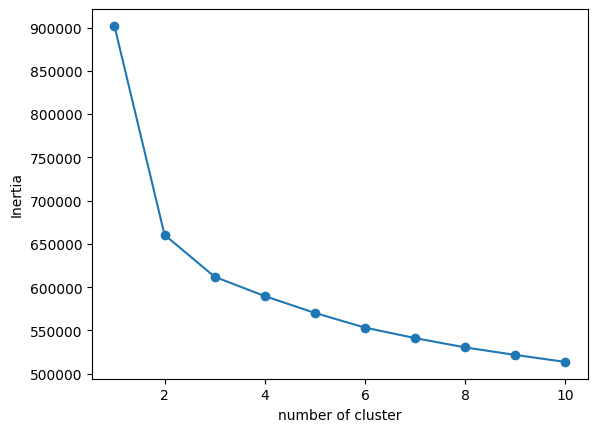

In [22]:
plt.plot(range(1,11),inertia,marker="o")
plt.xlabel("number of cluster")
plt.ylabel("Inertia")
plt.show()